<a href="https://colab.research.google.com/github/mpascalk/python11/blob/main/Tugas13_MPascalK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafik 1 - FREKUENSI 1800 Mhz

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800 #MHz
zona1='urban'
zona2='suburban'
zona3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
print(d)

[378 643 640 604 305 420 643 294 612 667 589 543 625 461 607 509 632 436
 287 330 542 283 568 204 344 232 522 617 537 651 595 447 502 327 399 398
 610 555 323 340 398 419 475 208 406 376 206 635 472 602 401 619 578 629
 541 263 450 432 553 341 298 594 532 310 317 586 613 356 353 236 422 454
 454 282 460 589 431 503 434 580 617 652 617 465 290 355 327 401 340 456
 488 380 454 437 248 612 520 424 472 203 301 563 514 666 580 232 662 345
 305 654 226 496 538 617 550 407 271 220 339 675 414 331 463 247 680 642
 510 517 414 290 319 238 371 564 288 382 681 592 393 374 264 326 396 484
 294 349 671 402 665 475 461 615 564 605 330 390 466 540 468 239 542 416
 386 513 446 582 642 616 619 316 210 350 554 385 206 316 671 439 691 454
 477 456 369 454 221 449 259 409 695 297 497 292 648 548 388 267 406 654
 513 515]


In [5]:
LpUrban=cos(f,zona1,tower,user,d)
LpSuburban=cos(f,zona2,tower,user,d)
LpOpen=cos(f,zona3,tower,user,d)

In [6]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

# Gambar Kurva

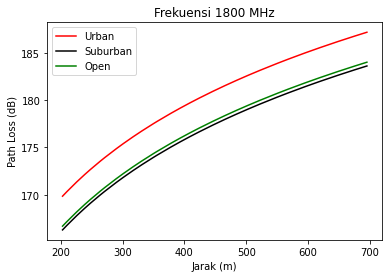

In [7]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'k-', label='Suburban')
plt.plot(d_sort,Open_sort,'g-', label='Open')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()


# Grafik 2 - Model Urban

In [8]:
f=700 #MHz
f2=900 #MHz
f3=1800 #MHz
zona1='urban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [9]:
LpUrban=cos(f,zona1,tower,user,d)
LpUrban2=cos(f2,zona1,tower,user,d)
LpUrban3=cos(f3,zona1,tower,user,d)

In [10]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

# Gambar Kurva 

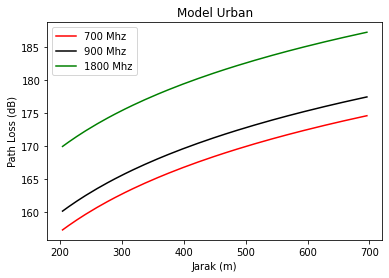

In [11]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'k-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'g-', label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()
